<a href="https://colab.research.google.com/github/Achyuta-Harshavardhan/Digit_recognizer_CNN_Keras/blob/main/Digit_Recognizer_CNN_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [2]:
df_train = pd.read_csv('/content/drive/MyDrive/Deep Learning/Datasets/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Deep Learning/Datasets/test.csv')

x_train = df_train.values[:,1:]
y_train = df_train.values[:,0]

y_train = to_categorical(y_train,10)

In [3]:
x = []
for i in x_train:
  x.append(i/255)

x = np.array(x).reshape(-1,28,28,1)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y_train, test_size=0.3)

In [5]:
model = Sequential()

model.add(Conv2D(32,5,padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(32,5,padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,3,padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(64,3,padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [6]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [7]:
model.fit(x_train,y_train,batch_size=128,validation_data=(x_test,y_test))

230/230 [==============================] - 3s 12ms/step - loss: 0.3438 - accuracy: 0.8891 - val_loss: 0.0816 - val_accuracy: 0.9737


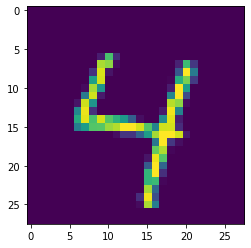

In [8]:
import matplotlib.pyplot as plt

plt.imshow(x_train[10][:,:,0])

In [9]:
np.argmax(model.predict(np.expand_dims(x_train[10],0)))

4